In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

## Q1: Don't type

Create the array: 
```
[[1,  6, 11],
 [2,  7, 12],
 [3,  8, 13],
 [4,  9, 14],
 [5, 10, 15]]
```
with out explicitly typing it in.

In [2]:
a = np.arange(1,16).reshape(3,5).T
print(a)

[[ 1  6 11]
 [ 2  7 12]
 [ 3  8 13]
 [ 4  9 14]
 [ 5 10 15]]


Now create a new array containing only its 2nd and 4th rows.

In [3]:
b = a[[1,3],:]
print(b)

[[ 2  7 12]
 [ 4  9 14]]


Create a 2d array with `1` on the border and `0` on the inside, e.g., like:
```
1 1 1 1 1
1 0 0 0 1
1 0 0 0 1
1 1 1 1 1
```

Do this using array slice notation to let it work for an arbitrary-sized array

In [5]:
n = 7
m = 5

a = np.zeros((n,m), dtype=int)
a[[0,-1],:] = 1
a[:,[0,-1]] = 1
print(a)

[[1 1 1 1 1]
 [1 0 0 0 1]
 [1 0 0 0 1]
 [1 0 0 0 1]
 [1 0 0 0 1]
 [1 0 0 0 1]
 [1 1 1 1 1]]


## Q2: Histrograms

Here we will read in columns of numbers from a file and create a histogram, using NumPy routines.  Make sure you have the data file
"`sample.txt`" in the same directory as this notebook. You download it from  https://raw.githubusercontent.com/sbu-python-summer/python-tutorial/master/day-3/sample.txt (and use python to download a file!)

  * Use `np.loadtxt()` to read this file in.  

  * Next, use `np.histogram()` to create a histogram array.  The output returns both the count and an array of edges.
  
  * Finally, loop over the bins and print out the bin center (averaging the left and right edges of the bin) and the count for that bin.

In [17]:
import wget

url = 'https://raw.githubusercontent.com/sbu-python-summer/python-tutorial/master/day-3/sample.txt'
wget.download(url)

100% [................................................................................] 2183 / 2183

'sample.txt'

In [27]:
data = np.loadtxt('sample.txt')
print(data.shape)

count, bins = np.histogram(data[:,1])
bins_center = (bins[1:]+bins[:-1])/2
for i in range(bins.shape[0]-1):
    print(f'[{bins[i]:.2f}  {bins[i+1]:.2f}], center = {bins_center[i]:.2f}, count = {count[i]}')

(100, 2)
[-30.59  -23.67], center = -27.13, count = 3
[-23.67  -16.75], center = -20.21, count = 4
[-16.75  -9.83], center = -13.29, count = 9
[-9.83  -2.92], center = -6.37, count = 22
[-2.92  4.00], center = 0.54, count = 22
[4.00  10.92], center = 7.46, count = 22
[10.92  17.84], center = 14.38, count = 9
[17.84  24.76], center = 21.30, count = 7
[24.76  31.68], center = 28.22, count = 1
[31.68  38.59], center = 35.14, count = 1


## Q3: Are you faster than numpy?

Numpy of course has a standard deviation function, `np.std()`, but here we'll write our own that works on a 1-d array (vector).  The standard
deviation is a measure of the "width" of the distribution of numbers
in the vector.

Given an array, $a$, and an average $\bar{a}$, the standard deviation
is:
$$
\sigma = \left [ \frac{1}{N} \sum_{i=1}^N (a_i - \bar{a})^2 \right ]^{1/2}
$$

Write a function to calculate the standard deviation for an input array, `a`:

  * First compute the average of the elements in `a` to define $\bar{a}$
  * Next compute the sum over the squares of $a - \bar{a}$
  * Then divide the sum by the number of elements in the array
  * Finally take the square root (you can use `np.sqrt()`)
  
Test your function on a random array, and compare to the built-in `np.std()`. Check the runtime as well.

In [72]:
def mean(a):
    sum = 0
    for el in a:
        sum += el
    return sum/a.shape[0]

def std(a):
    a_mean = mean(a)
    sq_sum = 0
    for el in a:
        sq_sum += (el-a_mean)**2
    return (sq_sum/a.shape[0])**(1/2)

In [77]:
import time

n_points = np.logspace(1, 6, 20, dtype=int)
trials = 20
time_matteo, time_numpy = [], []
for n in tqdm(n_points):
    tmp_matteo, tmp_numpy = [], []
    for i in range(trials):
        t = np.random.random(n)
        
        start = time.time()
        #std_matteo = std(t)
        std(t)
        tmp_matteo += [time.time()-start]
        
        start = time.time()
        #std_numpy = np.std(t)
        np.std(t)
        tmp_numpy += [time.time()-start]
    time_matteo += [np.mean(tmp_matteo)]
    time_numpy += [np.mean(tmp_numpy)]

  0%|          | 0/20 [00:00<?, ?it/s]

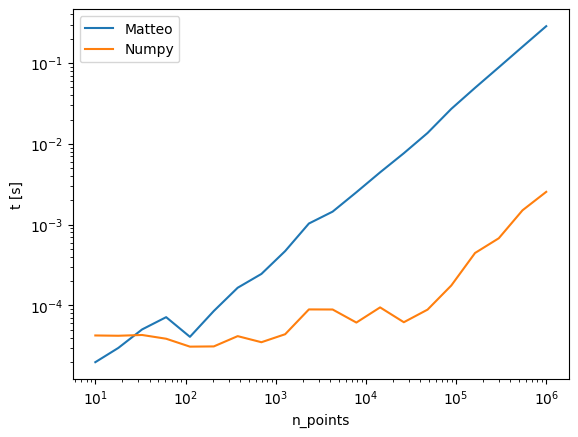

In [78]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(n_points, time_matteo, label='Matteo')
ax.plot(n_points, time_numpy, label='Numpy')
ax.set_xlabel('n_points')
ax.set_ylabel('t [s]')
ax.semilogx()
ax.semilogy()
plt.legend()

## Q4: Bootstraps

Boostrapping is a prominent statistical tecnique to estimate errors when you're stuck and don't know what else to o: https://erikjanvankesteren.nl/blog/2018-03-01-baron-bootstrap.html

Generate a 1D array (say from a Gaussian, but then add some outliers for fun). Compute the bootstrapped 95% confidence intervals for the mean of that array (i.e., resample the elements of an array with replacement N times, compute the mean of each sample, and then compute percentiles over the means). 

In [8]:
from scipy.stats import powerlaw

In [9]:
outliers = np.concatenate((powerlaw.rvs(2, loc=0, scale=5, size=0), np.random.uniform(low=-5, high=5, size=0)))
pop = np.concatenate((np.random.normal(loc=0, scale=1, size=10000), outliers))
np.random.shuffle(pop)

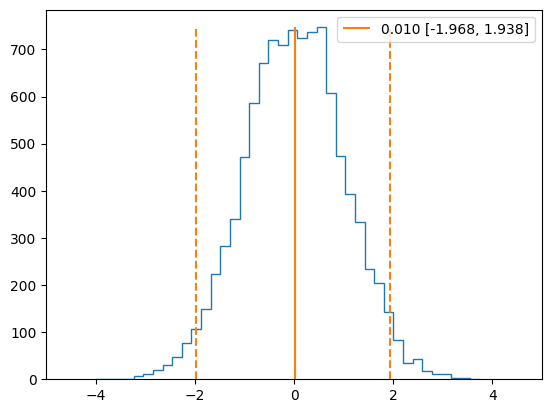

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
counts, bins, patches  = ax.hist(pop, bins=40, histtype='step')
ax.vlines(np.mean(pop), 0, np.max(counts), color='C1', label=f'{np.mean(pop):.3f} [{np.percentile(pop, 2.5):.3f}, {np.percentile(pop, 97.5):.3f}]')
ax.vlines(np.percentile(pop, 2.5), 0, np.max(counts), color='C1', linestyle='--')
ax.vlines(np.percentile(pop, 97.5), 0, np.max(counts), color='C1', linestyle='--')
ax.set_xlim(-5,5)
plt.legend()

In [11]:
n_times = np.logspace(0, 5, 5, dtype=int)
btsp = []
for n in n_times:
    resampled = [np.mean(np.random.choice(pop, 50)) for i in range(n)]
    btsp += [[np.mean(resampled), np.percentile(resampled, 2.5), np.percentile(resampled, 97.5)]]
btsp = np.array(btsp)

Text(0, 0.5, 'mean')

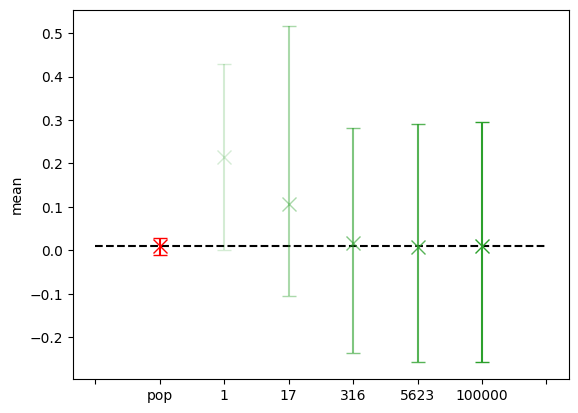

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.hlines(np.mean(pop), 0, n_times.shape[0]+2, color='k', linestyle='--')
ax.errorbar(1, np.mean(pop), yerr=[[np.abs(np.percentile(pop,2.5))/np.sqrt(pop.shape[0])], \
                                   [np.abs(np.percentile(pop,97.5))/np.sqrt(pop.shape[0])]], c='r', \
            marker='x', markersize=10, capsize=5)
for i, alpha in enumerate(np.linspace(0.2,1,n_times.shape[0])):
    ax.errorbar(2+i, btsp[i,0], yerr=[[np.abs(btsp[i,1])], [np.abs(btsp[i,2])]], c='C2', \
                alpha=alpha, marker='x', markersize=10, capsize=5)

ax.set_xticks(np.arange(0,n_times.shape[0]+3), labels=[None]+['pop']+[f'{n_times[i]}' for i in range(n_times.shape[0])]+[None])
ax.set_ylabel('mean')

In [154]:
ax.get_xticks()

array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.])

## Q5: Einstein summation

einsum is a powerful (but often painful) numpy thing:
- https://numpy.org/doc/stable/reference/generated/numpy.einsum.html
- https://stackoverflow.com/questions/26089893/understanding-numpys-einsum

Take 2 vectors A and B. Write the einsum equivalent of inner, outer, sum, and mul function.

In [ ]:
def neighbours(cell):

    return cell_neighbours


def count_neighbours(cell):

    return n_neighbours


def next_gen(cell):
    next_state = cell.copy()
    n_neighbours = count_neighbours(cell)
    
    if n_neighbours < 2:
        next_state[2] = 0

    elif n_neighbours in [2,3]:
        next_state[2] = 1

    elif 
    return next_state


def game_of_life(init_state):
    r"""Play Game of Life starting from an initial state
    
    The initial state is given as an array with n rows and 3 columns,
    where n corresponds to the grid dimension X\timesY. Each cell is defined 
    by (x,y, state), where (x,y) are the coordinates inside the grid and state
    can be either 0 = 'dead' or 1 = 'alive'."""

    grid = init_state
    new_grid = np.array([next_gen(cell) for cell in grid])

    
    